In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df_environment = pd.read_csv("datasets/environment_mex.csv")
df_environment.columns

In [ ]:
# Country Name, Country ISO3 and Indicator Code are unnecessary columns
df_environment.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1, inplace=True)

# Also row 0 is not necessary
df_environment.drop([0], inplace=True)

df_environment


## I want to use the indicator name in different columns

In [ ]:
pivot1 = pd.pivot_table(df_environment, index="Year", columns="Indicator Name", values="Value")
pivot1

In [ ]:
# I know the number of rows and columns from the previos table, but I can check the number of columns with the next code:
pivot1.shape[1]

## Now it's easier to check columns.
Considering that there are 129 columns, I think it's a good idea to select the ones that I want to analyze and create a new dataframe with them.

In [ ]:
# Check the name of the columns
pivot1.columns

In [ ]:
# There are lots of missing values. Let's count them:

missing_values_count = pivot1.isnull().sum()
missing_values_count

Now I can make a correlation heat map to find interesting relationships between values

### I'll save this code as a template for future uses

    correlations = pd.concat([pivot1["Adjusted savings: net national savings (current US$)"], pivot1["Agricultural land (% of land area)"], pivot1["Aquaculture production (metric tons)"]], axis=1 )
    corrmat = correlations.corr()
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corrmat, vmax=.8, square=True)



In [ ]:
# I'll save this table so I can upload it to Kaggle :D
pivot1.to_csv("datasets/WB_MX_Environment_indicators.csv")


# Total greenhouse gas emissions (% change from 1990)


In [ ]:
hist_ = pivot1['Total greenhouse gas emissions (% change from 1990)']
hist_.dropna()
pivot1['Total greenhouse gas emissions (% change from 1990)'].describe()




In [ ]:
hist_.plot.hist(figsize=(4,4))


In [ ]:
hist_.plot.line()

**What happened between 1995 and 2000?**


# Greenhouse gas emissions by sector in Mexico
Measured in CO2eq, million t

In [ ]:
df_ghge = pd.read_csv("datasets/ghg-emissions-by-sector.csv")
df_ghge.columns


In [ ]:
# I can pivot this table to use Countries as columns and years as index
df_ghge_mexico = df_ghge.query("Entity == 'Mexico'")
df_ghge_mexico.drop(['Entity', 'Code'], axis=1, inplace=True)
df_ghge_mexico

In [ ]:
df_ghge_mexico.set_index("Year", inplace=True)

In [21]:
# A global table from the last year in the table (2019)
row_2019 = df_ghge_mexico.filter(items=[2019], axis=0)
row_2019




,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
Year,,,,,,,,,,,
2019,9.854000e+07,1.697000e+07,4.760000e+07,4.281000e+07,5.653000e+07,1.517800e+08,1.866200e+08,2.244000e+07,3.799000e+07,9.570000e+06,1.504000e+07


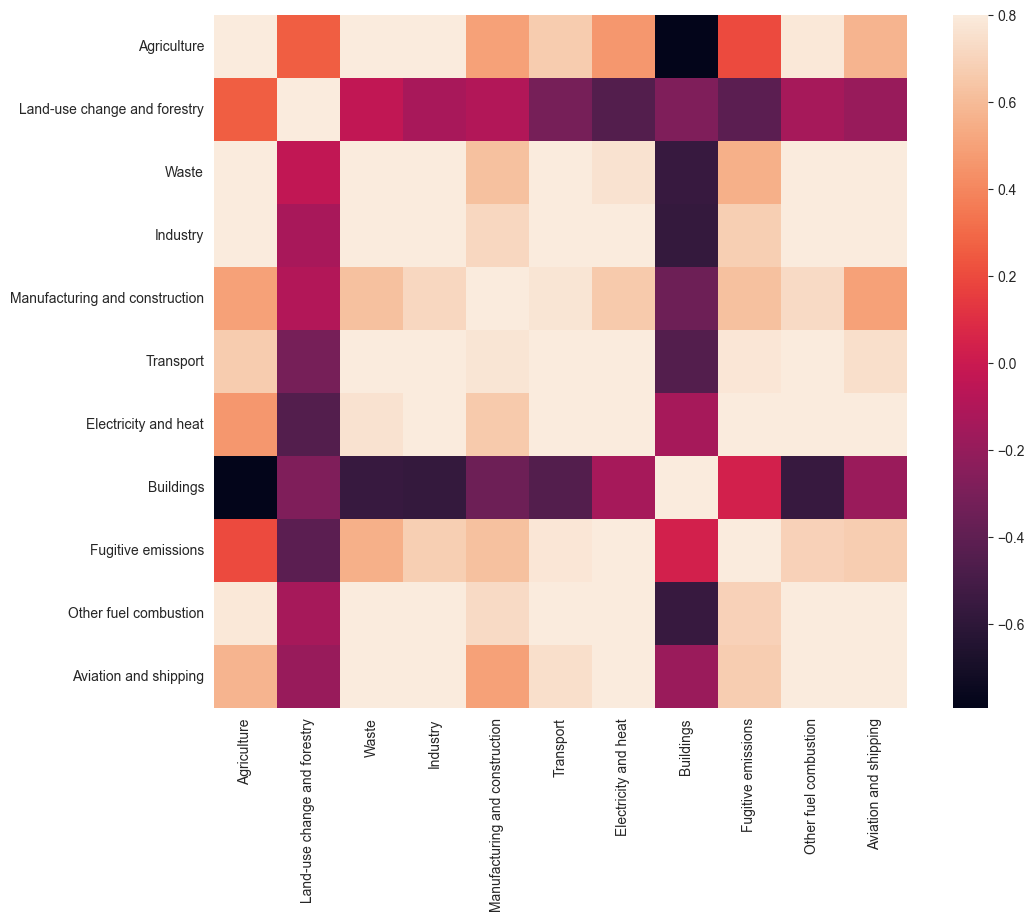